# Bucket sort performance

This notebook aims to show how bucketsort performs on different kinds of input. Here we compare two kinds of input, an evenly distributed array of numbers 1 to 10 and the same evenly distributed array, but with a large number inserted between every 50 elements.

The plots show timings of how the algorithms performs on an increasing list size. To be more specific we have an input size starting at 100 elements and going to 10 000, with an increment of 200 for each sorting iteration.

## Definitions

Here we define the bucketsort together with the utility functions needed for it.

- `flatten` simply converts a two-dimensional array to a one-dimensional one. We use it at the end of the bucket sort to concatenate all the buckets.

- `insertion_sort` does an insertion sort on a list. This is the sorting algorithm we use for each bucket.

- `bucket_sort` is the actual bucket sort algorithm which takes both the list (`list`) and a number of buckets (`k`). First it takes all the array items and determines which bucket to sort to using `k * list[i] / (m + 1)`, where `m` is the largest number in the array. Then it sorts all buckets using `insertion_sort` and returns the array after using `flatten`.

In [83]:
from math import floor

def flatten(multidim_arr):
    flattened = []
    for el in multidim_arr:
        for item in el:
            flattened.append(item)
    return flattened

def insertion_sort(list):
    n = len(list)
    if n <= 1:
        return list
    for i in range(1, len(list)):
        curr = list[i]
        # [1,3,5,2]
        j = i - 1;
        while j >= 0 and list[j] > curr:
            list[j + 1] = list[j]
            j-=1
        list[j+1] = curr
        
def bucket_sort(lst, k):
    buckets = [ [] for i in range(k)]
    m = max(lst)
    for i in range(len(lst)):
        buckets[floor(k * lst[i] / (m + 1))].append(lst[i])
    for j in range(k):
        insertion_sort(buckets[j])
    return flatten(buckets)

## Input generation

Here we define the input sizes and generation.

- `generate_even` creates an evenly distributed array with numbers 1-10 based on a given size (`size`)
- `generate_uneven` creates an evenly distributed array with numbers 1-10, but with the number 1 000 000, inserted every 50 elements based on a given size (`size`)

The constants at the top of the block define the:
- `INPUT_SIZE` initial input size
- `INPUT_SIZE_STEP` the increment of the input size
- `INPUT_SIZE_MAX` the largest input size to be timed

In [85]:
from random import randrange

INPUT_SIZE = 100
INPUT_SIZE_STEP = 200
INPUT_SIZE_MAX = 10000

def generate_even(size):
    list = [0 for _ in range(0, size)]
    for i in range(0, len(list)):
        list[i] = randrange(10)
    return list
    
def generate_uneven(size):
    list = [0 for _ in range(0, size)]
    for i in range(0, len(list)):
        if i % 50 == 0:
            list[i] = 1000000
            continue
        list[i] = randrange(10)
    return list

## Timing

Here we time the `bucket_sort` with the two inputs for each input size. Important to notice here is the second argument we provide to `bucket_sort`, which is the number of buckets. We always use a number of buckets equal to the list size.

We record all the times in arrays to later use for plotting.

In [91]:
from time import time

uneven_times = []
even_times = []
input_sizes = []

for size in range(INPUT_SIZE, INPUT_SIZE_MAX, INPUT_SIZE_STEP):
    input_sizes.append(size)
    
    uneven = generate_uneven(size) 
    start_uneven = time()
    bucket_sort(uneven, size)
    end_uneven = time()
    uneven_times.append(end_uneven - start_uneven)
    
    even = generate_even(size) 
    start_even = time()
    bucketsort(even, size)
    end_even = time()
    even_times.append(end_even - start_even)

print("Done")

Done


# Plots

_Note: All the code below is ChatGPT generated. The idea to show the different types of graphs however is original - came up after I saw the first graph :)_

## Direct comparison plot

On this first plot we can see the **time** on the **Y axis** that it took to sort and the **input size** on the **X axis**. The comparision on this first plot are the raw numbers.

As we can see the uneven data takes considerably more time. In fact the even data values are so insignifacant compared to the uneven that we can't see the linear nature of it. Take a look at the **Logarithmic plot** and the **Separate plots** below to get a better understanding of the differences.

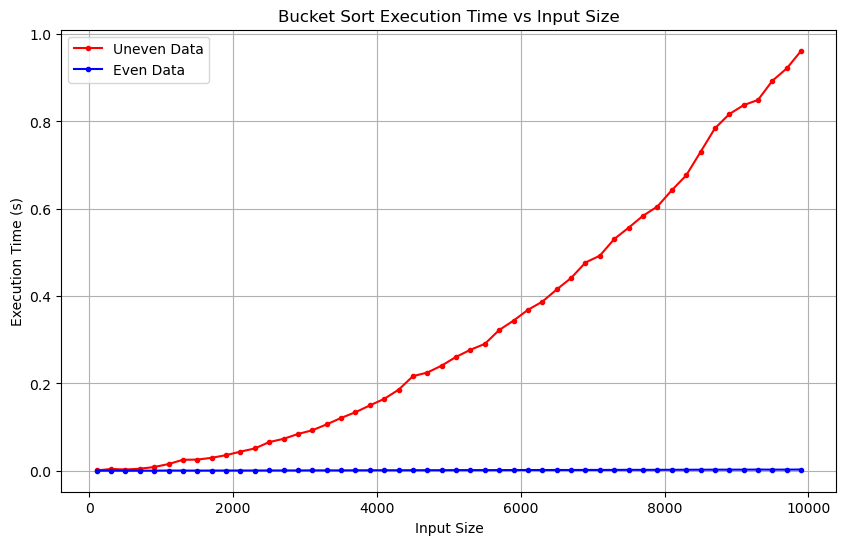

In [93]:
# Plot the results
plt.figure(figsize=(10, 6))

plt.plot(input_sizes, uneven_times, 'r.-', label='Uneven Data')
plt.plot(input_sizes, even_times, 'b.-', label='Even Data')

plt.title('Bucket Sort Execution Time vs Input Size')
plt.xlabel('Input Size')
plt.ylabel('Execution Time (s)')
plt.legend()
plt.grid(True)
plt.show()

## Logarithmic plot

Here we have made the Y axis logarithmic, which lets us observe the differences in time even though the difference in values are very high.
Now here we can really make out how much faster the linear time of the even is compared to the quadratic of the uneven

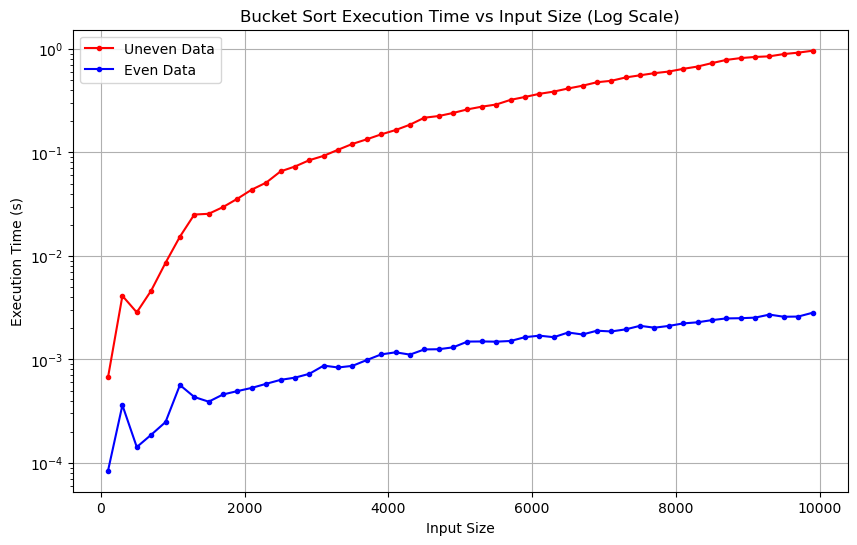

In [95]:
import matplotlib.pyplot as plt
# Plot the results with logarithmic scale
plt.figure(figsize=(10, 6))

# Plot uneven times
plt.plot(input_sizes, uneven_times, 'r.-', label='Uneven Data')

# Plot even times
plt.plot(input_sizes, even_times, 'b.-', label='Even Data')

# Set log scale on y-axis to compress the large differences
plt.yscale('log')

# Add title and labels
plt.title('Bucket Sort Execution Time vs Input Size (Log Scale)')
plt.xlabel('Input Size')
plt.ylabel('Execution Time (s)')

# Add legend
plt.legend()

# Add grid for better readability
plt.grid(True)

## Separate plots

What we can see from the two side by side plots below is the step up in time as the input size gets bigger.
- For the **uneven** input we can see that as the input size grows the increment in time increases compared to the previous input size. For example at the start of the graph the points are very close to each other. As we approach bigger sizes the points become quite distant.
- On the **even** input we do not observe that. There we see that the variation of the increment between input sizes is very small and hard to make out.

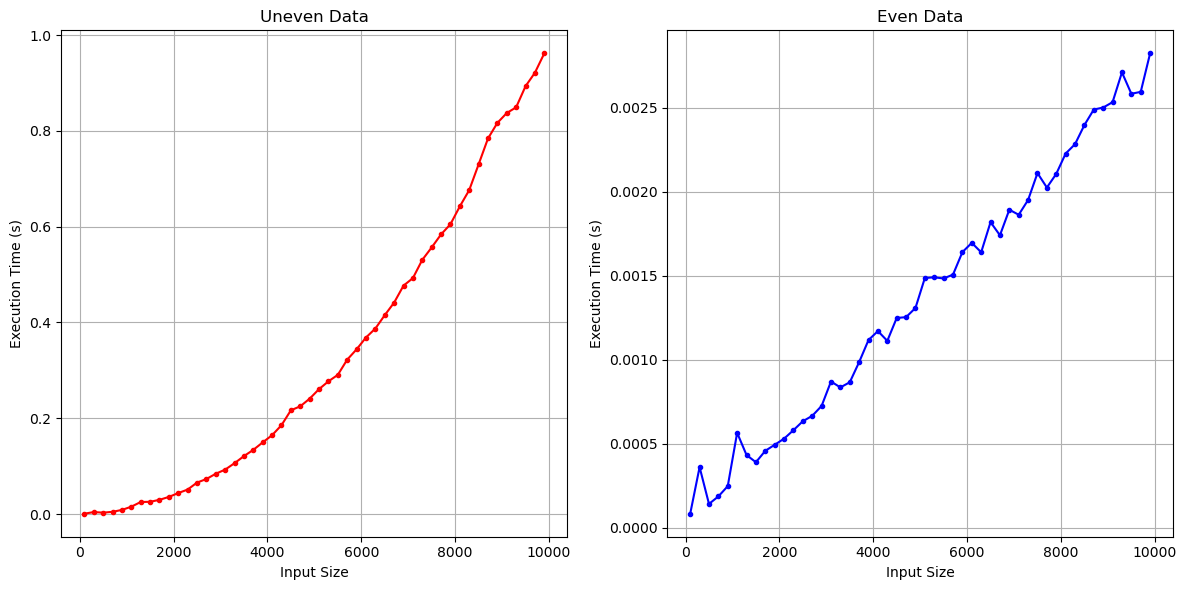

In [97]:
# Create two subplots side by side
plt.figure(figsize=(12, 6))
# Plot for uneven times
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.plot(input_sizes, uneven_times, 'r.-')
plt.title('Uneven Data')
plt.xlabel('Input Size')
plt.ylabel('Execution Time (s)')
plt.grid(True)

# Plot for even times
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.plot(input_sizes, even_times, 'b.-')
plt.title('Even Data')
plt.xlabel('Input Size')
plt.ylabel('Execution Time (s)')
plt.grid(True)

# Show both plots
plt.tight_layout()
plt.show()